# Estudo do conjunto demografico do Titanic 

## Sobre o conjunto de dados utilizado

O conjunto de dados tratado neste relatório foi obtido da plataforma **Kaglle**. O Kanglle é uma plataforma de Hackathon ou Desafios de Machine Learning.

Os dados a serem observados dizem respeito aos passageiros do famoso transatlantico TITANIC pertecente a Companhia maritima RMS

### Dicionario de dados

 <table style="width:90%">
  <tr>
    <th>Column</th>
    <th>Type</th>
    <th>Descrição</th>
  </tr>
  <tr>
    <td>PassengerId</td>
    <td>Numeric</td>
    <td>type should be integers</td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>Numeric</td>
    <td>Survived or Not</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Numeric</td>
    <td>Class of Travel</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>String</td>
    <td>Name of Passenger</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>String</td>
    <td>Gender</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Numeric</td>
    <td></td>
  </tr>
  <tr>
    <td>SibSp</td>
    <td>String</td>
    <td>Number of Sibling/Spouse aboard</td>
  </tr>
  <tr>
    <td>Parch</td>
    <td>Numeric</td>
    <td>Number of Parent/Child aboard</td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>String</td>
    <td></td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>Numeric</td>
    <td></td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>String</td>
    <td></td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>String</td>
    <td>The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown</td>
  </tr>
</table> 


## O problema (pergunta a ser respondida)


### Diante do conjunto de dados demograficos do Titanic podemos traçar um perfil de evacuação adotado?

### Perguntas?

- Passageiros do sexo feminino possuem maior propensão a serem salvos?
- Pessoas idosas estão menos propensas a serem salvas?
- Passageiros com maior número de familiares são mais propensos a serem salvos?

### Variaveis Idependentes:
- Sex;
- Grupo etário;
- Family size.

### Variavel dependente:
- Survived


## Descrição do processo de investigação

### Limpeza e preparação dos dados

In [640]:
#importando biblioteca pamdas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

% matplotlib inline

#carregando dataset
df = pd.read_csv('titanic-data-6.csv')

**Visão geral dos dados**

In [641]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Número de amostras e colunas do conjunto de dados**

In [642]:
print("O DataFrame possui {0} linha e {1} colunas.".format(df.shape[0], df.shape[1]))

O DataFrame possui 891 linha e 12 colunas.


**Presença de linhas duplicadas no conjunto de dados**

In [643]:
#Existencia de linhas duplicadas
print("O conjunto de dados possui {} linhas duplicadas".format(df.duplicated().sum()))

O conjunto de dados possui 0 linhas duplicadas


**Tipos de dados das colunas**

In [644]:
#tipos de dados das colunas
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Observando o tipo de dados das colunas *object*

In [645]:
for i, tipo in enumerate(df.dtypes):
     if tipo == 'object':
        print(df.columns[i], type(df.columns[i][0]))

Name <class 'str'>
Sex <class 'str'>
Ticket <class 'str'>
Cabin <class 'str'>
Embarked <class 'str'>


**Atributos com valor ausente**

In [646]:
msg = ""
vlr = []
for i, coluna in enumerate(df.columns):
    if df[df.columns[i]].isnull().sum() != 0:
        msg += df.columns[i]
        msg += ", "
        vlr.append(df[df.columns[i]].isnull().sum())
if vlr == "":
    print("Não há colunas com valores nulos no DataFrame examinado!")
else:
    print("As coluna(s): {} possuem respectivamente {} valores nulos!".format(msg, vlr))


As coluna(s): Age, Cabin, Embarked,  possuem respectivamente [177, 687, 2] valores nulos!


Apesar da coluna **Age** ser uma de nossas variaveis independentes e possuir valores Nulos. A sua representatividade ainda é superior a 80% do total de dados.

**Valores unicos não nulos**

In [647]:
#retorna o número de valores unicos de cada coluna
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Apresentando a densidade média do conjunto de dados**

In [648]:
#retorna estatistica descritica de cada coluna
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observação**<br>
1. No momento a densidade média apresentada não é significativa. Faz-se necessário realizar alguns tratamentos de dados faltantes e não númerico das nossas variaveis independentes consideradas, criar colunas de variavel independente não existente no conjunto de dados original;
2. Utilizaremos [feature engineering](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) apresentado no Kaggle para criar novas caracteristicas para analise dos dados.

**Criando novas Features**<br>
Criaremos as Features 'Title', 'Deck' e 'Family_Size'<br>
- A *Fueature* 'Family_Size' é uma de nossas variaveis independentes de analise obtido da relação das features 'SibSp' (irmãos/cônjuges a bordo do Titanic) e 'Parch' (pais/filhos a bordo do Titanic);
- A *Fueature* 'Title' extraido da feature 'Name' e realizado algumas conversões pelos tratamentos comuns a epoca;
- A *Feature* 'Deck' extraido da feature 'Cabin'

In [649]:
import string


#convertendo os dados object para string
df['Cabin'] = df['Cabin'].astype('str')
df['Name'] = df['Name'].astype('str')
df['Sex'] = df['Sex'].astype('str')
df['Ticket'] = df['Ticket'].astype('str')
df['Embarked'] = df['Embarked'].astype('str')

def substrings_in_string(big_string, substrings):
    '''Função para retornar uma substring de uma string'''
    
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

#Criando a feature 'Title' extraindo da feature 'Name'
df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
 
def replace_titles(x):
    '''Função para substituição dos titulos ou tratamentos aos nomes'''
    
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title


df['Title']=df.apply(replace_titles, axis=1)

#Criando a feature 'Deck' extraindo da feature 'Cabin'
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

#criando a feature 'Family_Size' pela adição das features 'SibSp' + 'Parch'
df['Family_Size']=df['SibSp']+df['Parch']


<p>Para a criação da feature Class_Age sera adotado a classificação da WHO (World Health Organization)<br>

In [653]:
def grupo_etario(idade):
    '''Função para retornar o grupo etario a que pertence uma idade'''
    
    if idade > 0.0 and idade <= 9.0:
        return 'child'
    elif idade > 9.0 and idade <= 19.0:
        return 'teenager'
    elif idade > 19.0 and idade <= 59.0:
        return 'adult'
    elif idade > 59.0:
        return 'senior'
    else:
        return np.nan 
    
df['Class_Age']=df['Age'].map(lambda x: grupo_etario(x) )

**Descartando colunas sem valia para a analise**

In [654]:
df.drop(['SibSp', 'Parch', 'Fare', 'Cabin', 'Ticket', 'Deck'], axis=1, inplace=True)

**Eliminando linhas com valores nulos da coluna *'Age'* **

In [655]:
df = df.dropna(axis=0, subset=['Age'])

In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
Embarked       714 non-null object
Title          714 non-null object
Family_Size    714 non-null int64
Class_Age      714 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 61.4+ KB


**Salvando o *dataset* inicialemente tratado**

In [657]:
df.to_csv('titanic_data_edited.csv', index=False)

## Conclusões

### Analise exploratoria dos dados

Iniciando a exploração dos dados com informações visuais

In [658]:
df_titanic = pd.read_csv('titanic_data_edited.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Title,Family_Size,Class_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S,Mr,1,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,Mrs,1,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S,Miss,0,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,Mrs,1,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S,Mr,0,adult


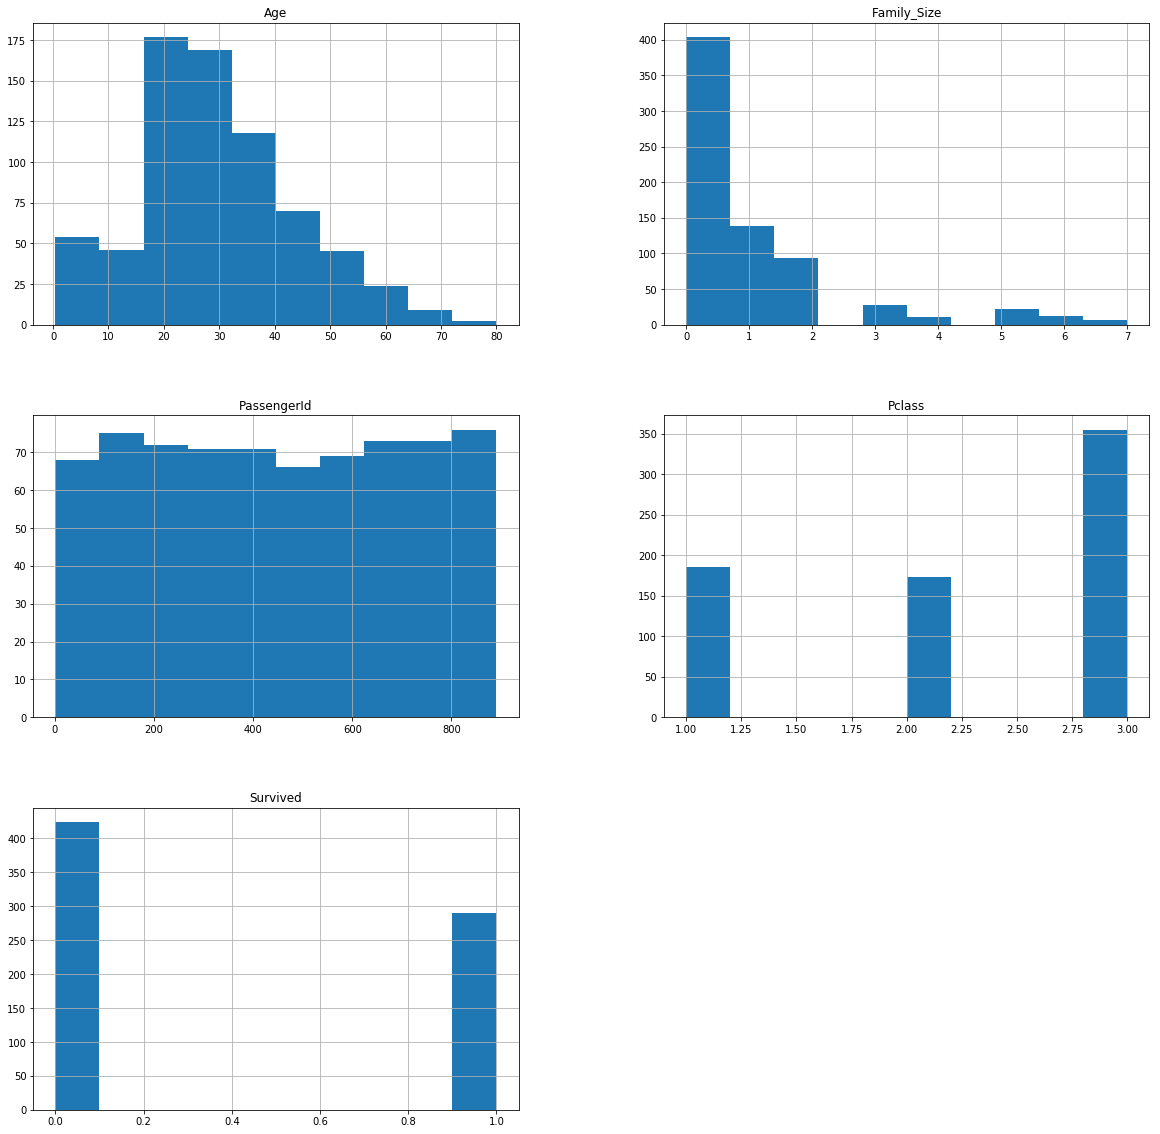

In [659]:
df_titanic.hist(figsize=[20, 20]);

In [660]:
df_titanic.mean()

PassengerId    448.582633
Survived         0.406162
Pclass           2.236695
Age             29.699118
Family_Size      0.943978
dtype: float64

In [661]:
df_titanic.groupby('Survived').mean()

,PassengerId,Pclass,Age,Family_Size
Survived,,,,
0,442.299528,2.485849,30.626179,0.891509
1,457.768966,1.872414,28.343690,1.020690


In [662]:
df_titanic.groupby(['Survived', 'Sex']).mean()

PassengerId    Pclass        Age  Family_Size
Survived Sex                                                  
0        female   424.203125  2.812500  25.046875     2.046875
         male     445.516667  2.427778  31.618056     0.686111
1        female   445.395939  1.822335  28.847716     1.121827
         male     483.978495  1.978495  27.276022     0.806452

In [663]:
df_titanic.groupby(['Survived', 'Class_Age']).mean()

PassengerId    Pclass        Age  Family_Size
Survived Class_Age                                               
0        adult       446.675000  2.456250  33.101562     0.550000
         child       372.083333  2.916667   5.041667     4.833333
         senior      426.526316  1.578947  65.394737     0.526316
         teenager    451.885246  2.754098  16.877049     1.245902
1        adult       460.009804  1.745098  34.095588     0.813725
         child       458.000000  2.447368   3.478158     2.263158
         senior      535.285714  1.428571  64.285714     0.571429
         teenager    433.170732  2.048780  16.634146     0.975610

In [664]:
df_titanic.groupby(['Survived', 'Family_Size']).mean()['PassengerId']

Survived  Family_Size
0         0              470.310219
          1              347.365079
          2              446.700000
          3              426.333333
          4              298.125000
          5              417.578947
          6              459.750000
          7              393.833333
1         0              444.661538
          1              473.210526
          2              471.849057
          3              508.809524
          4              610.000000
          5              289.666667
          6              147.750000
Name: PassengerId, dtype: float64

In [665]:
df_titanic.groupby(['Survived', 'Sex', 'Class_Age', 'Family_Size']).mean()

PassengerId    Pclass        Age
Survived Sex    Class_Age Family_Size                                  
0        female adult     0             453.764706  2.705882  31.029412
                          1             331.800000  2.800000  32.600000
                          2             450.333333  2.833333  31.000000
                          3             499.000000  1.000000  25.000000
                          4             580.666667  3.000000  32.666667
                          5             564.333333  3.000000  41.666667
                          6             611.000000  3.000000  39.000000
                          7             679.000000  3.000000  43.000000
                child     1             206.000000  3.000000   2.000000
                          2             853.000000  3.000000   9.000000
                          3             298.000000  1.000000   2.000000
                          4             182.666667  3.000000   6.666667
                          5             639.000000  3.000000   5.500000
                          6             492.000000  3.000000   5.666667
                teenager  0             398.250000  3.000000  16.750000
                          1             288.333333  3.000000  16.833333
                          2             229.500000  3.000000  14.000000
                          6             543.000000  3.000000  11.000000
                          7              72.000000  3.000000  16.000000
         male   adult     0             471.077670  2.524272  32.706311
                          1             342.977273  1.954545  34.284091
                          2             441.318182  2.227273  35.818182
                          3             440.250000  2.250000  27.500000
                          5             361.000000  3.000000  40.000000
                          6              14.000000  3.000000  39.000000
                child     4               8.000000  3.000000   2.000000
                          5             295.125000  3.000000   4.375000
                          6             517.000000  3.000000   6.500000
                          7             434.000000  3.000000   5.000000
                senior    0             411.933333  1.666667  65.566667
...                                            ...       ...        ...
1        female adult     4             759.000000  1.500000  37.500000
                          5             289.666667  1.333333  23.666667
                          6              26.000000  3.000000  38.000000
                child     0             778.000000  3.000000   5.000000
                          1             631.000000  2.666667   4.000000
                          2             350.875000  2.500000   3.875000
                          3             381.000000  2.500000   3.083333
                          6             234.000000  3.000000   5.000000
                senior    0             657.000000  2.000000  62.500000
                          1             321.500000  1.000000  61.500000
                teenager  0             450.153846  2.461538  16.769231
                          1             502.200000  1.800000  16.533333
                          2             380.333333  1.333333  18.333333
                          3             436.000000  1.000000  14.000000
                          4             312.000000  1.000000  18.000000
                          6              69.000000  3.000000  17.000000
         male   adult     0             481.911111  2.088889  33.355556
                          1             519.133333  1.333333  34.533333
                          2             511.000000  1.666667  35.666667
                          3             391.000000  1.000000  36.000000
                child     1             778.000000  3.000000   3.210000
                          2             485.307692  2.230769   3.717692
                          3             426.333333  2.000000   0.973333
       

**Gráficos de Barra** é uma boa escolha para demonstrar como algumas quantidades variam entre um conjunto particular de itens.

<br>Observação da Variavel *Family_Size* em relação a *Survived*<br>

In [666]:
# Use query para selecionar cada grupo e obter sua qualidade média
mediana_family_size = df_titanic["Family_Size"].median()
low_family_size = df.query('Family_Size <= {}'.format(mediana_family_size))
high_family_size = df.query('Family_Size > {}'.format(mediana_family_size))

mean_family_size_low = low_family_size['Survived'].mean()
mean_family_size_high = high_family_size['Survived'].mean()

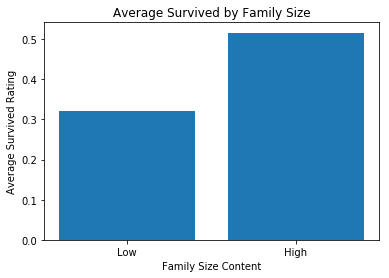

In [667]:
# Crie um gráfico de barras com rótulos adequados
locations = [1, 2]
heights = [mean_family_size_low, mean_family_size_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Survived by Family Size')
plt.xlabel('Family Size Content')
plt.ylabel('Average Survived Rating');

<br>Observação da Variavel **'Sex'** em relação a **'Survived'**<br>

Text(0,0.5,'Count')

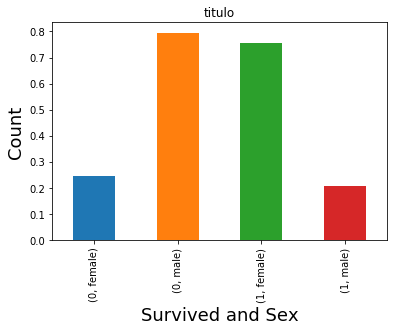

In [668]:
counts_survived_sex = df_titanic.groupby(['Survived', 'Sex']).count()['Family_Size']
totals_survived_sex = df_titanic.groupby('Sex').count()['Family_Size']
proportions_survived_sex = counts_survived_sex / totals_survived_sex

proportions_survived_sex.plot(kind='bar', title='titulo', alpha=1)
plt.xlabel('Survived and Sex', fontsize=18)
plt.ylabel('Count', fontsize=18)

Observação da Variavel 'Class_Age' em relação a 'Survived'

Text(0,0.5,'Count')

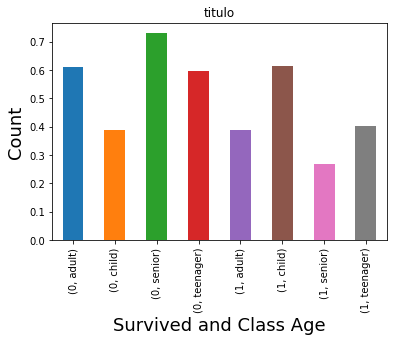

In [669]:
counts_survived_age_group = df_titanic.groupby(['Survived', 'Class_Age']).count()['Family_Size']
total_survived_age_group = df_titanic.groupby('Class_Age').count()['Family_Size']
proportions_survived_age_group = counts_survived_age_group / total_survived_age_group

proportions_survived_age_group.plot(kind='bar', title='titulo', alpha=1)
plt.xlabel('Survived and Class Age', fontsize=18)
plt.ylabel('Count', fontsize=18)

## Resultados

### Diante do conjunto de dados demograficos do Titanic podemos traçar um perfil de evacuação adotado?

Os resultados não são conclusivos, mas demonstram uma percepção de tendencia no processo de evacuação a passageiros com o perfil: mulheres, crianças e familias

### Perguntas?

- Passageiros do sexo femeninos possui maior propemsão a serem salvos?<br>
**Evidenciou-se uma maior tendencia a passageiros do sexo femeninos serem salvos.**

- Pessoas idosas estão menos propensas a serem salvas?<br>
**Os resultados não evidenciaram a uma menor propenção de idosos ou seniors a serem salvos**

- Passageiros com maior número de familiares são mais propensos a serem salvos?<br>
**Os resultados apontaram uma pequena tendencia a passageiros com familias a bordo**

### Variaveis Idependentes:
- Sex;
- Grupo etário;
- Family size.

### Variavel dependente:
- Survived

## Referências

- https://www.kaggle.com/c/titanic/data
- https://www.kaggle.com/c/titanic/discussion
- https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/
- https://www.encyclopedia-titanica.org/
- http://www.un.org/en/development/desa/population/publications/pdf/ageing/WPA2015_Report.pdf
- https://www.who.int/ageing/mulheres_saude.pdf
- 
